# Project Presentation

## Aim of the Project:
As a group, we are planning on developing a platform that identifies mental health disorders according to symptoms provided by the patient. Our platform will help classify mental disorders and support the clinician with diagnosing the mental health disorder. Also, it may raise awareness and encourage people to seek help. We will work with a large dataset with multiple variables, which will be eventually evaluated by a machine learning algorithm.

## Project Deliverables:
We aim to create a machine learning application to help diagnose mental disorders. We will provide a machine learning model to develop an indicator or classifier to determine the mental health state of a person to support early detection. We will analyze the given data to finally make a code that shows data set of results.

If our project leads to a "Full success", our model will be used to detect a mental disorder from several features or states of a person. In this case, since we plan to create a code for a data set, Jupyter Notebook will be an appropriate interface.

On the other hand, if we happen to come up with a "Partial success", we will be at least able to show several relationships between features; for example, how an willingness to seek help from psychologists is related to a satisfaction with life? In this case, we will deliver data analysis in code, therefore a Jupyter Notebook will be an appropriate interface.

## Data Acquisition

In [2]:
# standard imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px

In [3]:
def prep_data(data_df, cols):
    '''
    prepares data for analysis
    data_df is dataframe to be prepared/processed
    returns dataframe with necessary columns and without nan values  
    '''
    data_df = data_df[cols]
    data_df = data_df.dropna()
    return data_df

In [4]:
df = pd.read_sas("mhcld_puf_2019.sas7bdat").replace(-9.0, np.nan)
df

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,ODDFLG,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID
0,2019.0,NaN,NaN,4.0,2.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,3.0,2.019000e+10
1,2019.0,14.0,4.0,4.0,6.0,2.0,1.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.0,2.019000e+10
2,2019.0,12.0,NaN,4.0,3.0,2.0,1.0,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,3.0,2.019000e+10
3,2019.0,10.0,NaN,4.0,5.0,2.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,3.0,2.019000e+10
4,2019.0,2.0,2.0,4.0,5.0,2.0,1.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.0,2.019000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362039,2019.0,5.0,NaN,4.0,5.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,2.019636e+10
6362040,2019.0,4.0,4.0,4.0,6.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,2.019636e+10
6362041,2019.0,8.0,1.0,4.0,2.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,99.0,0.0,0.0,2.019636e+10
6362042,2019.0,11.0,4.0,4.0,4.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,2.019636e+10


In [5]:
df.keys()

Index(['YEAR', 'AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE',
       'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2',
       'MH3', 'SUB', 'MARSTAT', 'SMISED', 'SAP', 'EMPLOY', 'DETNLF', 'VETERAN',
       'LIVARAG', 'NUMMHS', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
       'STATEFIP', 'DIVISION', 'REGION', 'CASEID'],
      dtype='object')

## Understanding the Data

`df["AGE"]`: Calculated from the client's date of birth at midpoint of the state's elected reporting period:

    1 0–11 years
    2 12–14 years
    3 15–17 years
    4 18–20 years
    5 21–24 years
    6 25–29 years
    7 30–34 years
    8 35–39 years
    9 40–44 years
    10 45–49 years
    11 50–54 years
    12 55–59 years
    13 60–64 years
    -9 Missing/unknown/not collected/invalid 

`df["EDUC"]`: Specifies the school grade level of three sub-populations of clients, as follows:

    1 Special education
    2 0 to 8
    3 9 to 11 
    4 12 (or GED) 
    5 More than 12
    -9 Missing/unknown/not collected/invalid 

`df["ETHNIC"]`: Identifies whether or not the client is of Hispanic or Latino origin. Report the most recent available information for ethnicity at the end of the reporting period:

    1 Mexican
    2 Puerto Rican
    3 Other Hispanic or Latino origin
    4 Not of Hispanic or Latino origin
    -9 Missing/unknown/not collected/invalid
    

`df["RACE"]`: Specifies the client's most recent reported race at the end of the reporting period:
    
    1 American Indian/Alaska Native
    2 Asian
    3 Black or African American
    4 Native Hawaiian or Other Pacific Islander
    5 White
    6 Some other race alone/two or more races
    -9 Missing/unknown/not collected/invalid

`df["GENDER"]`: Identifies the client's most recent reported sex at the end of the reporting period:
    
    1 Male
    2 Female
    -9 Missing/unknown/not collected/invalid



`df["CMPSERVICE"]`: This field identifies whether a client received services from any Community Mental Health Centers (CMHCs), outpatient
clinics, partial care organizations, partial hospitalization programs, PACT programs, consumer run programs (including Club
Houses and drop-in centers), and all community support programs (CSP):
    
    1 Served in SMHA-funded/operated community-based program
    2 Not served in SMHA-funded/operated community-based program

`df["MH1"]`, `df["MH2"]`, `df["MH3"]`: MENTAL HEALTH DIAGNOSIS 1, 2, and 3
Specifies the client's current first, second, and third mental health diagnosis during the reporting period:

    1 Trauma- and stressor-related disorders
    2 Anxiety disorders 
    3 Attention deficit/hyperactivity disorder (ADHD) 
    4 Conduct disorders 
    5 Delirium, dementia 
    6 Bipolar disorders 
    7 Depressive disorders 
    8 Oppositional defiant disorders 
    9 Pervasive developmental disorders 
    10 Personality disorders 
    11 Schizophrenia or other psychotic disorders
    12 Alcohol or substance use disorders 
    13 Other disorders/conditions 
    -9 Missing/unknown/not collected/invalid/no or deferred diagnosis

`df["SMISED"]`: Indicates whether the client has serious mental illness (SMI) or serious emotional disturbance (SED) using the state
definition. Use the most recent available status at the end of the reporting period:
    
    1 SMI 
    2 SED and/or at risk for SED 
    3 Not SMI/SED 
    -9 Missing/unknown/not collected/invalid

`df["SAP"]`: Substance Use Problem:

Specifies the client’s substance use problem based on a substance use diagnosis and/or using other identification method
such as substance use screening results, enrollment in a substance use program, substance use survey, service claims
information, or other related sources of data:
    
    1 Yes 
    2 No 
    -9 Missing/unknown/not collected/invalid

`df["NUMMHS"]`: Number of mental health diagnoses reported:
Calculates the number of valid mental health diagnoses (maximum of three) that are reported for each client. For instance,
the value of this variable will be 3 if nonmissing values are provided for all three mental health diagnoses (MH1, MH2, and
MH3):
    
    0 0 
    1 1 
    2 2 
    3 3

`df["EMPLOY"]`: Specifies the client’s employment status at discharge (for new clients) or the most recent available employment status at
the end of the reporting period (for continuing clients). This data element is reported for all clients (16 years old and
over) who are receiving services in non-institutional setting. Institutional settings include correctional facilities like prison,
jail, detention centers, and mental health care facilities like state hospitals, other psychiatric inpatient facilities, nursing
homes, or other institutions that keep a person, otherwise able, from entering the labor force:

    1 Full-time 
    2 Part-time 
    3 Employed full-time/part-time not differentiated 
    4 Unemployed 
    5 Not in labor force 
    -9 Missing/unknown/not collected/invalid


`df["MARSTAT"]`: Identifies the client's marital status:

    1 Never married 
    2 Now married 
    3 Separated 
    4 Divorced, widowed 
    -9 Missing/unknown/not collected/invalid

## Summary Table

In [6]:
def summary_table(df, group_cols,value_cols):
    return df.groupby(group_cols)[value_cols].mean().round(2)

In [7]:
summary_table(df,["GENDER","EDUC"],["SAP","NUMMHS"])

SAP  NUMMHS
GENDER EDUC              
1.0    1.0   1.69    1.57
       2.0   1.79    1.40
       3.0   1.56    1.38
       4.0   1.51    1.35
       5.0   1.56    1.36
2.0    1.0   1.70    1.52
       2.0   1.81    1.37
       3.0   1.65    1.44
       4.0   1.62    1.45
       5.0   1.65    1.48

## Visualizations

We can visualize the race and gender of individuals who at some point were diagnosed with depressive disorders using a pie chat. To do that we will define a function `df_depression`.

In [8]:
def depression_chart(df, col, map_dict):
    """
    This function takes in a dataframe, a specified column, and a dictionary of
    numrical values to strings and outputs a pie chart showing the percentage of
    people diagnosed with depressive disorders for each value in the dictionary.
    """
    df = df[[col, "DEPRESSFLG"]] # get relevant columns
    # depressive disorder corresponds to 1 in the DEPRESSFLG column
    df = df[df["DEPRESSFLG"]==1] 
    df = df.dropna(subset=[col]) # drop nan values from RACE
    df[col] = df[col].map(map_dict) # map to string values
    # create the pie chart
    fig = px.pie(df,
                 values = df.groupby(col).size(),
                 names = df.groupby(col).groups.keys(),
                 title = "Number of People Diagnosed with Depressive Disorders by " + col)
    fig.show()

In [9]:
# Define the mapping dictionaries for race and gender
map_dict1 = {1: 'American Indian/Alaska Native',
             2: 'Asian',
             3: 'Black or African American',
             4: 'Native Hawaiian or Other Pacific Islander',
             5: 'White',
             6: 'Some other race alone/two or more races'}

map_dict2 = {1: "Male", 2: "Female"}

In [10]:
# plot race pie chart
depression_chart(df, "RACE", map_dict1)

In [11]:
# plot gender pie chart
depression_chart(df, "GENDER", map_dict2)

Now we will create a bar chart showing the number of patients with more than 2 mental health diagnoses reported in each age group. To do that we define a function `nummhs_bar`.

In [12]:
def nummhs_bar(df):
    """
    This function takes in a dataframe and creates a bar chart of the numer of
    people with more than 2 mental health diagnoses reported in each age group.
    """
    df = df[["AGE", "NUMMHS"]] # get relevant columns
    df = df[df["NUMMHS"]>=2] # find patients with more than 2 diagnoses
    df = df.dropna() # drop NaN values
    # create a dictionary for age values
    map_dict = {1: "0–11", 2: "12–14", 3: "15–17", 4: "18–20", 5: "21–24",
                6: "25–29", 7: "30–34", 8: "35–39", 9: "40–44", 10: "45–49",
                11: "50–54", 12: "55–59", 13: "60–64", 14: "> 65"}
    df["AGE"] = df["AGE"].map(map_dict) # mape age to dictionary-defined values
    # create the bar chart
    fig = px.bar(df,
                 y = df.groupby(["AGE"]).size(),
                 x = df.groupby("AGE").groups.keys(),
                 text = df.groupby(["AGE"]).size(),
                 title = "Number of Patients with More than 2 Mental Health Diagnoses Reported in Each Age Group",
                 labels = {'x': 'Age (Years)', 'y':'Number of Patients'})
    fig.show()

In [13]:
nummhs_bar(df)

Now we will make a visualization for each state showing the average number of mental health diagnoses reported per individual vs. average age of patients in each state. We will use the function `plot_states` for this purpose.

In [14]:
def plot_states(df):
    """
    This function plots the average number of mental health diagnoses reported
    per individual vs. average age of patients in each state where the size of
    the state on the plot is controlled by the number of individuals who are
    from this state.
    """
    df = df[["STATEFIP", "NUMMHS", "AGE"]]
    df = df.dropna()
    # create a dictionary of states names
    states = pd.read_csv("state-fips.csv", header=None).set_index(0)
    states_dict = states.to_dict()[1]
    states_dict[72] = "Puerto Rico"
    states_dict[99] = "Other jurisdictions"
    # map state values to state names
    df["STATEFIP"] = df["STATEFIP"].map(states_dict)
    # create plot
    fig = px.scatter(df,
                     x = df.groupby("STATEFIP")["AGE"].mean(),
                     y = df.groupby("STATEFIP")["NUMMHS"].mean(), 
                     size = df.groupby("STATEFIP").size(),
                     color = df.groupby("STATEFIP").groups.keys(),
                     hover_name = df.groupby("STATEFIP").groups.keys(),
                     title = "Average Number of Mental Health Diagnoses Reported vs. Average Age",
                     labels = {'x': 'Age (Years)', 'y':'Average Number of Mental Health Diagnoses'})
    fig.update_layout(xaxis = dict(tickmode = 'array',
                                   tickvals = [5, 6, 7, 8, 9, 10],
                                   ticktext = ["21–24", "25–29", "30–34", "35–39", "40–44", "45–49"]))
    fig.show()

In [15]:
plot_states(df)

FileNotFoundError: [Errno 2] No such file or directory: 'state-fips.csv'

In [18]:
df["SAP"] = df["SAP"].map({2.0:0,1.0:1})

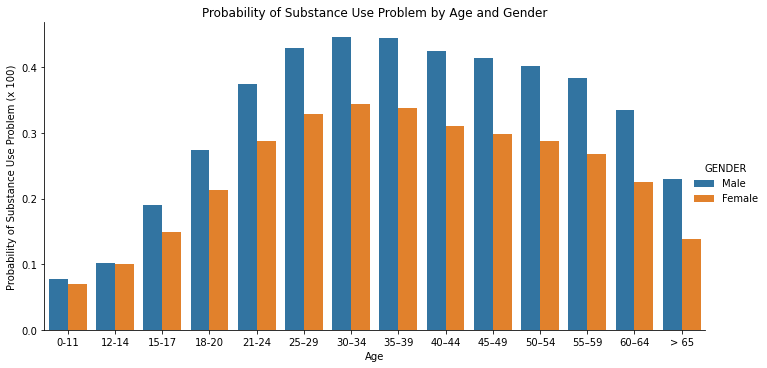

In [19]:
import seaborn as sns

label_age_range = ["0-11", "12-14", "15-17", "18-20", "21-24", "25–29", "30–34", "35–39", "40–44", "45–49",
                "50–54", "55–59", "60–64", "> 65"]




age_substance_use = sns.catplot(x="AGE", y="SAP", hue="GENDER", data=df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
age_substance_use.set_xticklabels(label_age_range)

gender_list = ["Male","Female"]
for t, l in zip(age_substance_use._legend.texts, gender_list): t.set_text(l)



plt.title('Probability of Substance Use Problem by Age and Gender')
plt.ylabel('Probability of Substance Use Problem (x 100)')
plt.xlabel('Age')

plt.show()

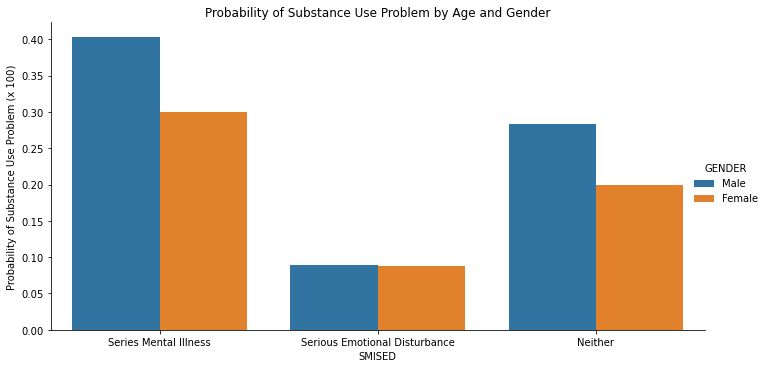

In [20]:

label_SMI_SED = ["Series Mental Illness", "Serious Emotional Disturbance", "Neither"]



age_substance_use = sns.catplot(x="SMISED", y="SAP", hue="GENDER", data=df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
age_substance_use.set_xticklabels(label_SMI_SED)

gender_list = ["Male","Female"]
for t, l in zip(age_substance_use._legend.texts, gender_list): t.set_text(l)



plt.title('Probability of Substance Use Problem by Age and Gender')
plt.ylabel('Probability of Substance Use Problem (x 100)')

plt.show()